# <center>EDA of the Global Terrorism Database: Hotspots, Groups & Attack Patterns</center>

## Project Objectives

* Perform 'Exploratory Data Analysis' on the `Global Terrorism` dataset.
* Identify the **hot zones** of terrorism from a security/defense analyst's perspective.
* Derive security insights and key findings through the EDA process.

### 1. Data Loading and Initial Inspection 📊

In [1]:
# Import necessary libraries for data analysis and visualization.
import math
import warnings
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import seaborn as sns # For statistical data visualization
import plotly.offline as py # For interactive plotting
import plotly.graph_objs as go # For building graph objects
import matplotlib.pyplot as plt # For creating static plots
import os
warnings.filterwarnings('ignore')

# Load the dataset from the specified path.
terror = pd.read_csv('C:\\Terrorism Data\\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [2]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### 2. Data Cleaning and Preprocessing 🧹
#### Several columns are renamed for clarity, and a subset of the most relevant columns is selected for the analysis.

In [4]:
# Renaming columns for clarity and easier reference.
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                       'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                       'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                       'motive':'Motive'}, inplace=True)

In [5]:
# Selecting a subset of important columns for further processing.
terror = terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type',
                 'Weapon_type','Motive']]

### 3. Exploratory Data Analysis (EDA) 🔎
#### This section explores the data to find initial insights, including null values, data types, and key statistical facts about the attacks.

In [6]:
# Checking for null values in each column to understand data completeness.
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [7]:
# Getting a concise summary of the DataFrame, including data types and non-null values.
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [8]:
# Print the most frequent values for key features to get a quick overview of trends.
print("Country with the most attacks:", terror['Country'].value_counts().idxmax())
print("City with the most attacks:", terror['city'].value_counts().index[1]) # The first entry is 'Unknown'
print("Region with the most attacks:", terror['Region'].value_counts().idxmax())
print("Year with the most attacks:", terror['Year'].value_counts().idxmax())
print("Month with the most attacks:", terror['Month'].value_counts().idxmax())
print("Group with the most attacks:", terror['Group'].value_counts().index[1])
print("Most Common Attack Type:", terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Common Attack Type: Bombing/Explosion


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


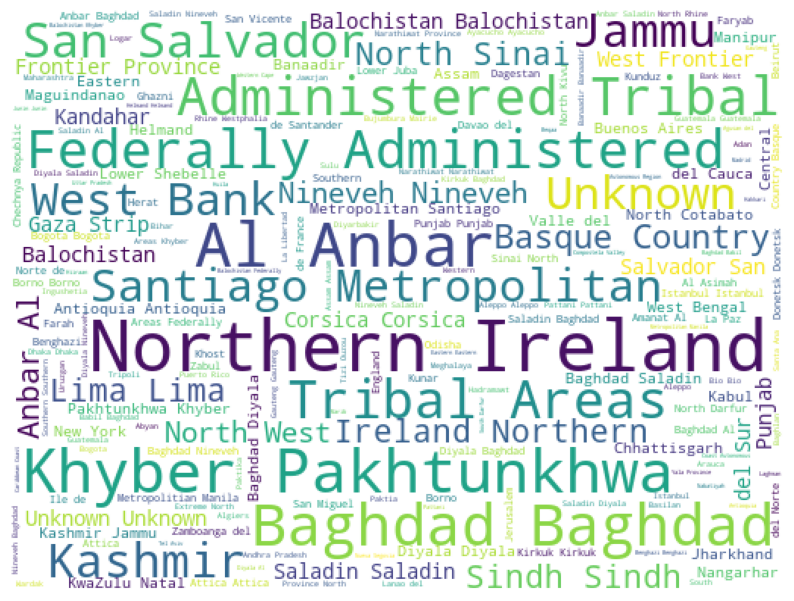

In [10]:
# Generating a word cloud of the states with the most attacks to visually highlight hotspots.
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### 4. Data Visualization 📈
#### This part of the notebook uses various plots to visualize trends, geographical distributions, and the human impact of terrorism.

#### 4.1. Number of Terrorist Activities by Year
##### These bar plots show the trend of terrorist attacks over time, revealing a significant increase in recent years.

In [11]:
# Display the number of attacks per year in a sorted series.
terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [14]:
# Define the folder name
output_folder = "Plots"

# Create the directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

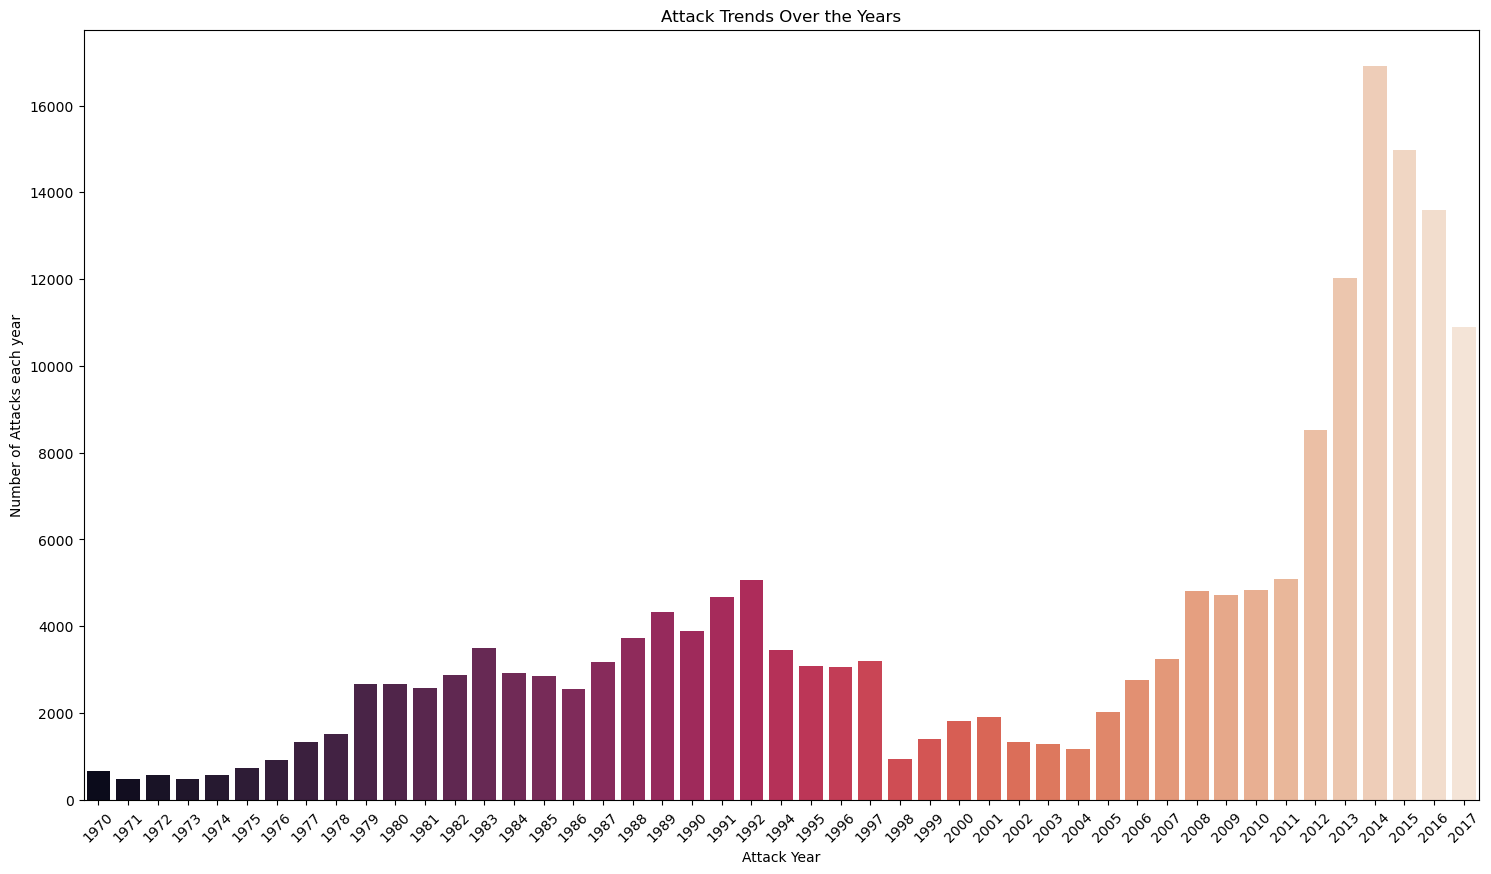

In [15]:
# Create a bar plot showing the number of attacks each year.
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Trends Over the Years')

plt.savefig(os.path.join(output_folder, 'Attack_Trends_Over_The_Years_Bar_Plot.png'))


plt.show()

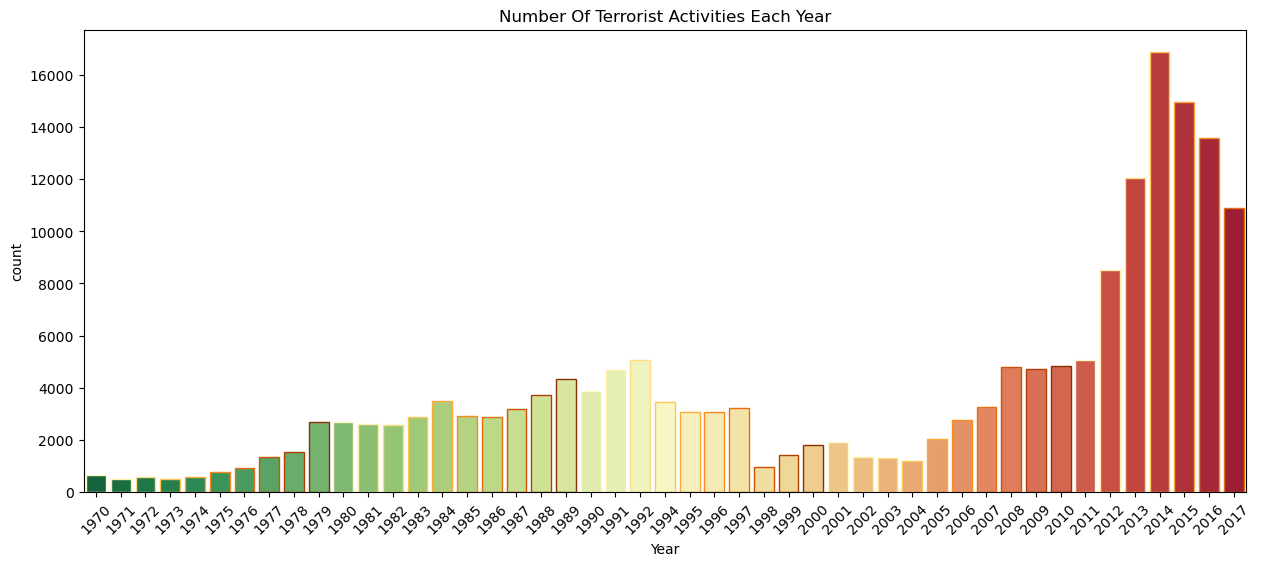

In [16]:
# Creating a count plot to visualize the number of terrorist activities each year.
plt.subplots(figsize=(15,6))
# Explicitly set the x-axis to the 'Year' column from the 'terror' DataFrame.
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')


plt.savefig(os.path.join(output_folder, 'Yearly_Attacks_Count_Plot.png'))

plt.show()

#### 4.2. Terrorist Activities by Region
##### An area plot is used to show the number of attacks in each region over time, highlighting shifts in the geographic focus of terrorism.

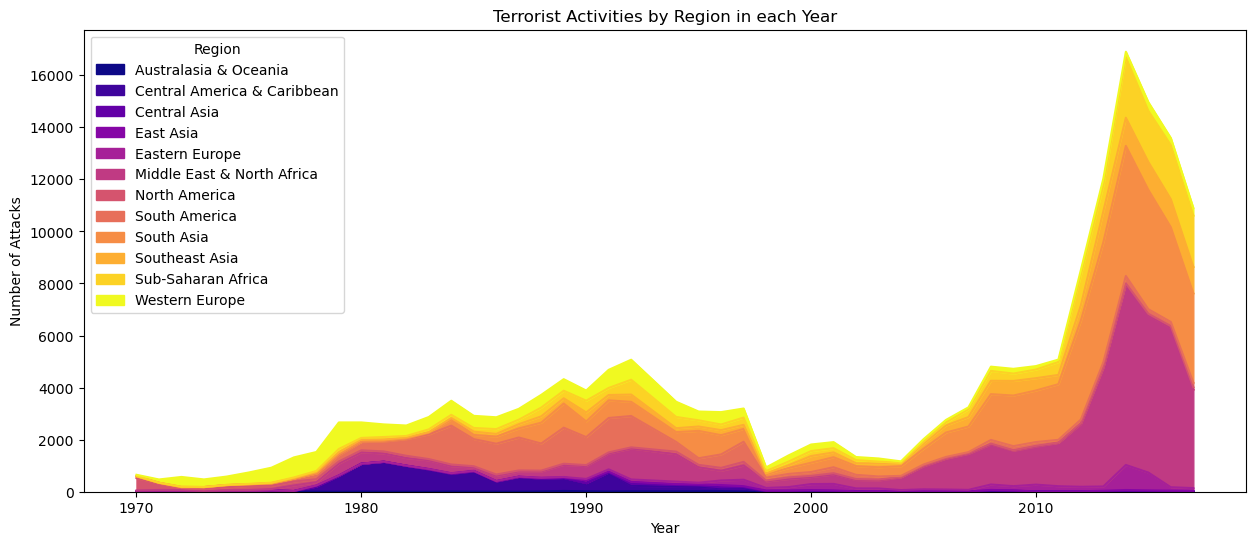

In [17]:
# Plotting the number of attacks per region over time using an area plot.
# Using the 'plasma' colormap
pd.crosstab(terror.Year, terror.Region).plot(kind='area', figsize=(15,6), colormap='plasma')
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### 4.3. Casualty Analysis and Heatmap
##### A new casualities column is created by summing Killed and Wounded victims. A heatmap then visualizes the most severe attacks.

In [18]:
# Fill null values in 'Wounded' and 'Killed' columns with 0 and convert to integer type.
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
# Create a new column 'casualities' to represent the total number of victims.
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [19]:
# Selecting the top 40 attacks with the highest casualties for a focused heatmap.
terror1 = terror.sort_values(by='casualities', ascending=False)[:40]

In [20]:
# Creating a pivot table to prepare data for the heatmap.
heat = terror1.pivot_table(index='Country', columns='Year', values='casualities')
heat.fillna(0, inplace=True)

In [21]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pip install -U kaleido

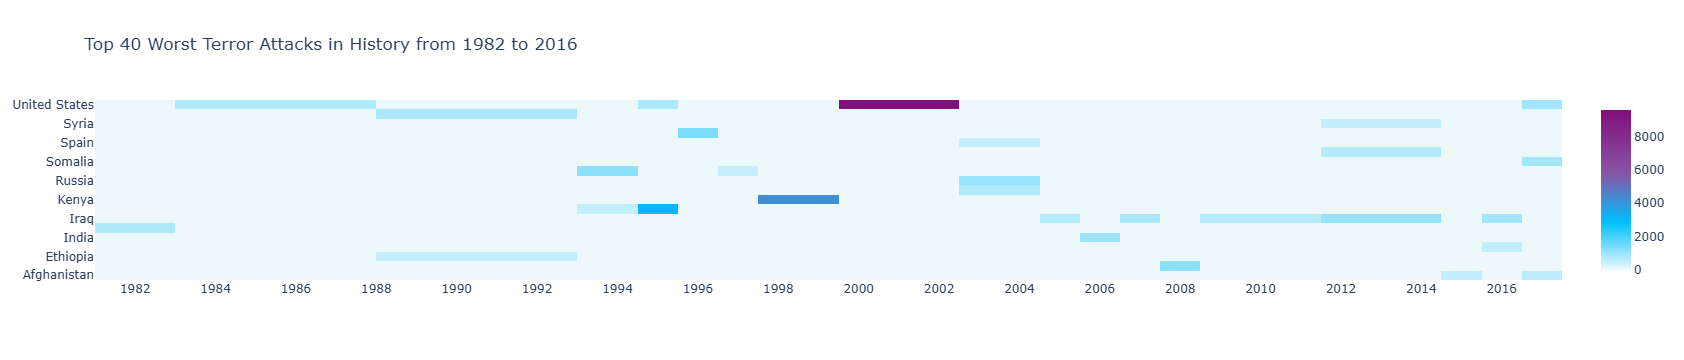

In [28]:
# Generating an interactive heatmap using Plotly.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)

#### 4.4. Top Countries Affected by Attacks
##### A bar plot is used to visualize the countries with the highest number of terrorist attacks.

In [29]:
# Display the top 15 countries with the most attacks.
terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

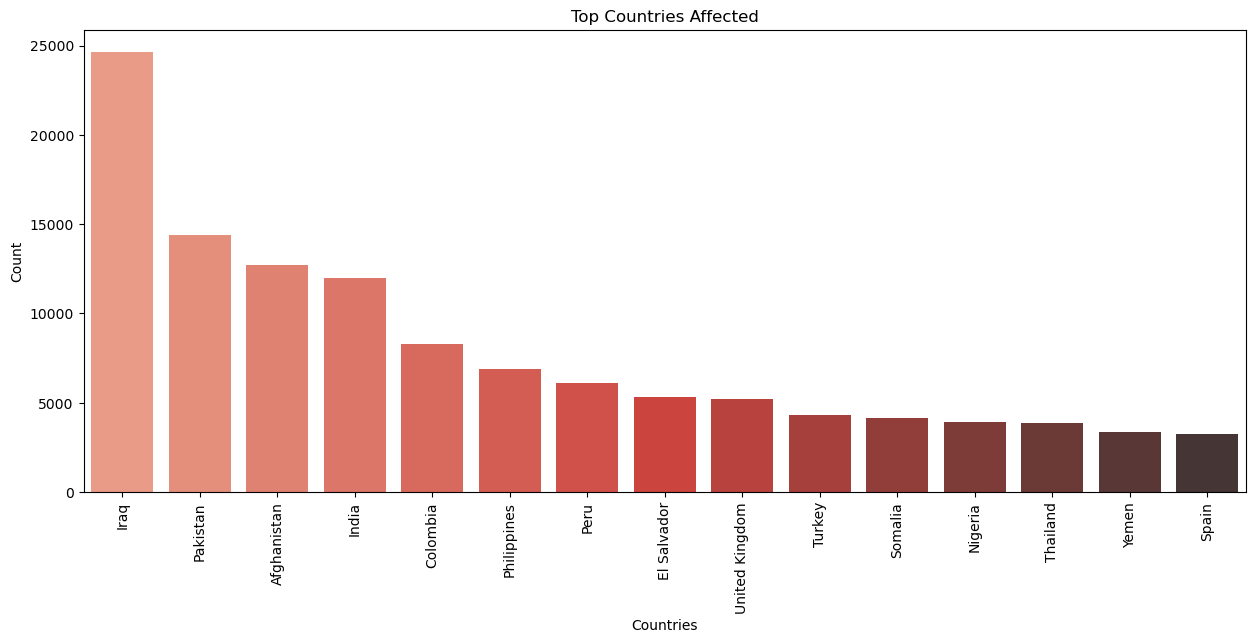

In [30]:
# Creating a bar plot to visualize the top 15 countries affected.
plt.subplots(figsize=(15,6))
sns.barplot(x=terror['Country'].value_counts()[:15].index,
            y=terror['Country'].value_counts()[:15].values,
            palette='Reds_d')  # Changed from 'Blues_d' to 'Reds_d'
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### 5. In-depth Analysis of Terrorist Groups and Locations 🗺️
#### This section uses the folium library to create interactive maps to visualize the geographical spread of terrorist attacks and the operational areas of specific terrorist groups.

In [31]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Filtering data for the year 1970 to plot attack locations.
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970
filterData = terror[filterYear]
reqFilterData = filterData.loc[:,'city':'longitude'].dropna()
reqFilterDataList = reqFilterData.values.tolist()

In [33]:
# Creating a basic Folium map to visualize attacks in 1970.
map = folium.Map(location=[0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1], reqFilterDataList[point][2]],
                  popup=reqFilterDataList[point][0]).add_to(markerCluster)
map

In [34]:
# Finding the most active terrorist groups (excluding 'Unknown').
terror.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [35]:
# Filtering data for specific well-known terrorist groups.
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [36]:
# Preparing data for plotting the operational areas of top groups.
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [37]:
# Creating a clustered marker map to show the operational areas of top groups.
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(name='clustered icons', overlay=True, control=False)
for i in range(0, len(terror_df_group)):
    marker = folium.Marker([terror_df_group.iloc[i]['latitude'], terror_df_group.iloc[i]['longitude']]) 
    popup = 'Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.LayerControl().add_to(m1)
m1

#### <center>84% of the terrorist attacks in 1970 were carried out on the American continent.<center>

### 6. Fatalities Analysis
#### This section focuses on the number of fatalities and analyzes which attack types and countries are most deadly.

In [39]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [40]:
# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [41]:
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [42]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [43]:
# Creating a pivot table to get the total number of people killed by each attack type.
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [44]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 152.0+ bytes


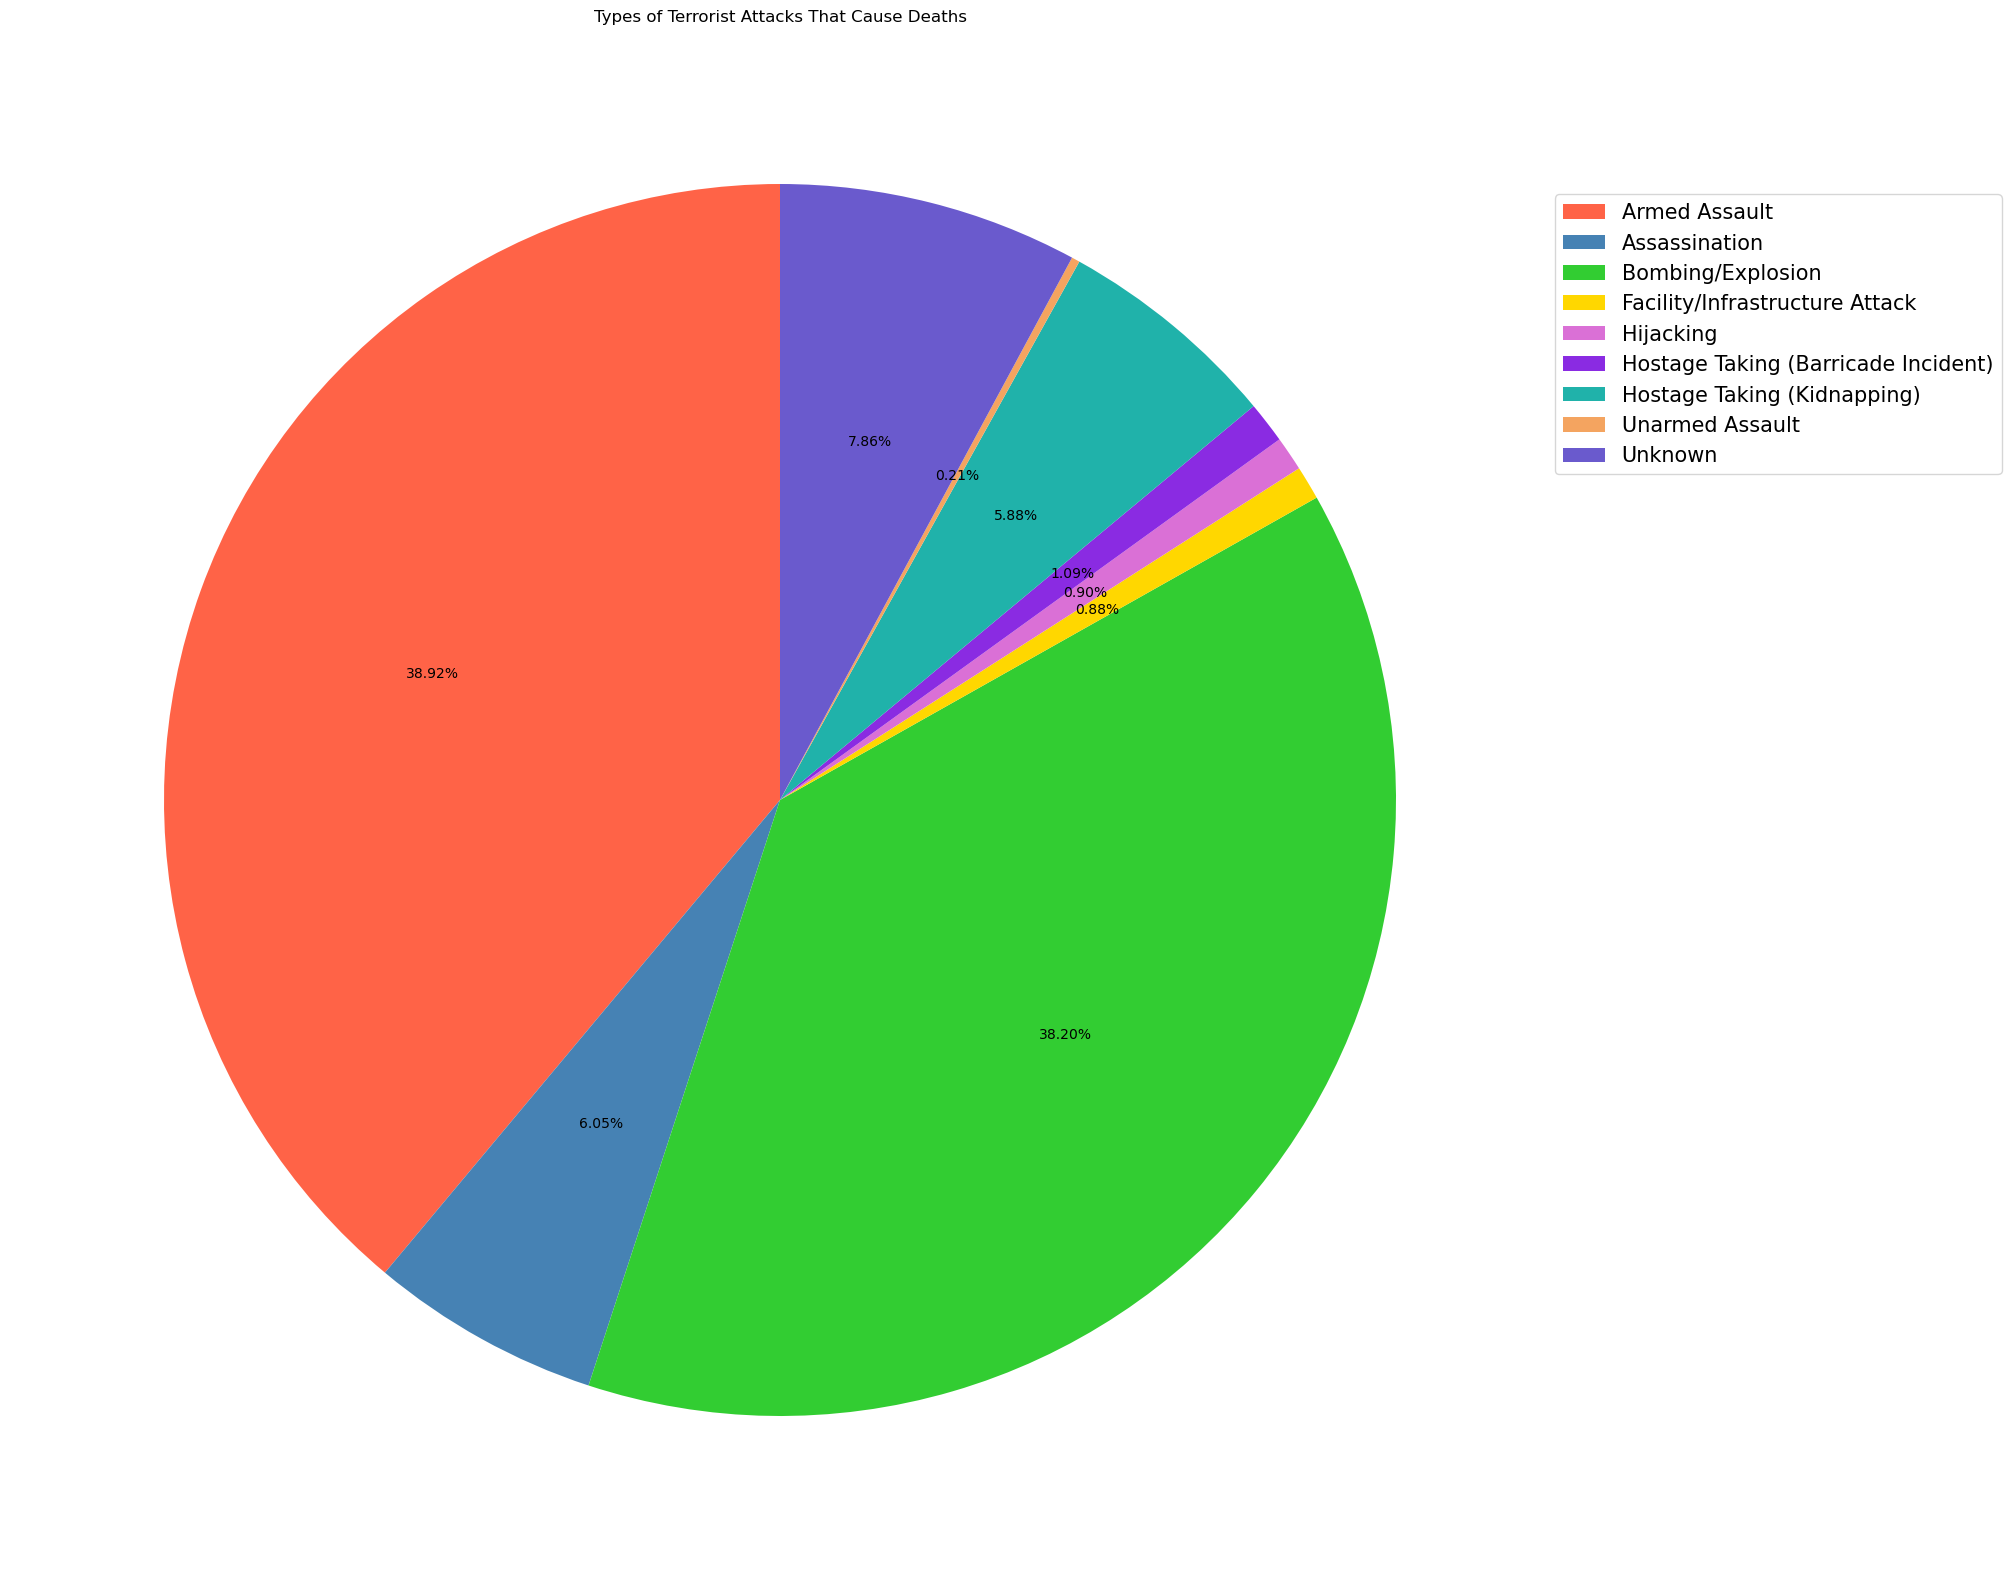

In [45]:
# Creating a pie chart to visualize the distribution of deaths by attack type.
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T
values = transpoze.values.tolist()
# The fix: flatten the nested list to make it a 1D list
values = [item for sublist in values for item in sublist]

# Define a list of colors
pie_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#DA70D6', '#8A2BE2', '#20B2AA', '#F4A460', '#6A5ACD']

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%', colors=pie_colors)
plt.title('Types of Terrorist Attacks That Cause Deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.show()

### <center>Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks.</center>

In [46]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [47]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

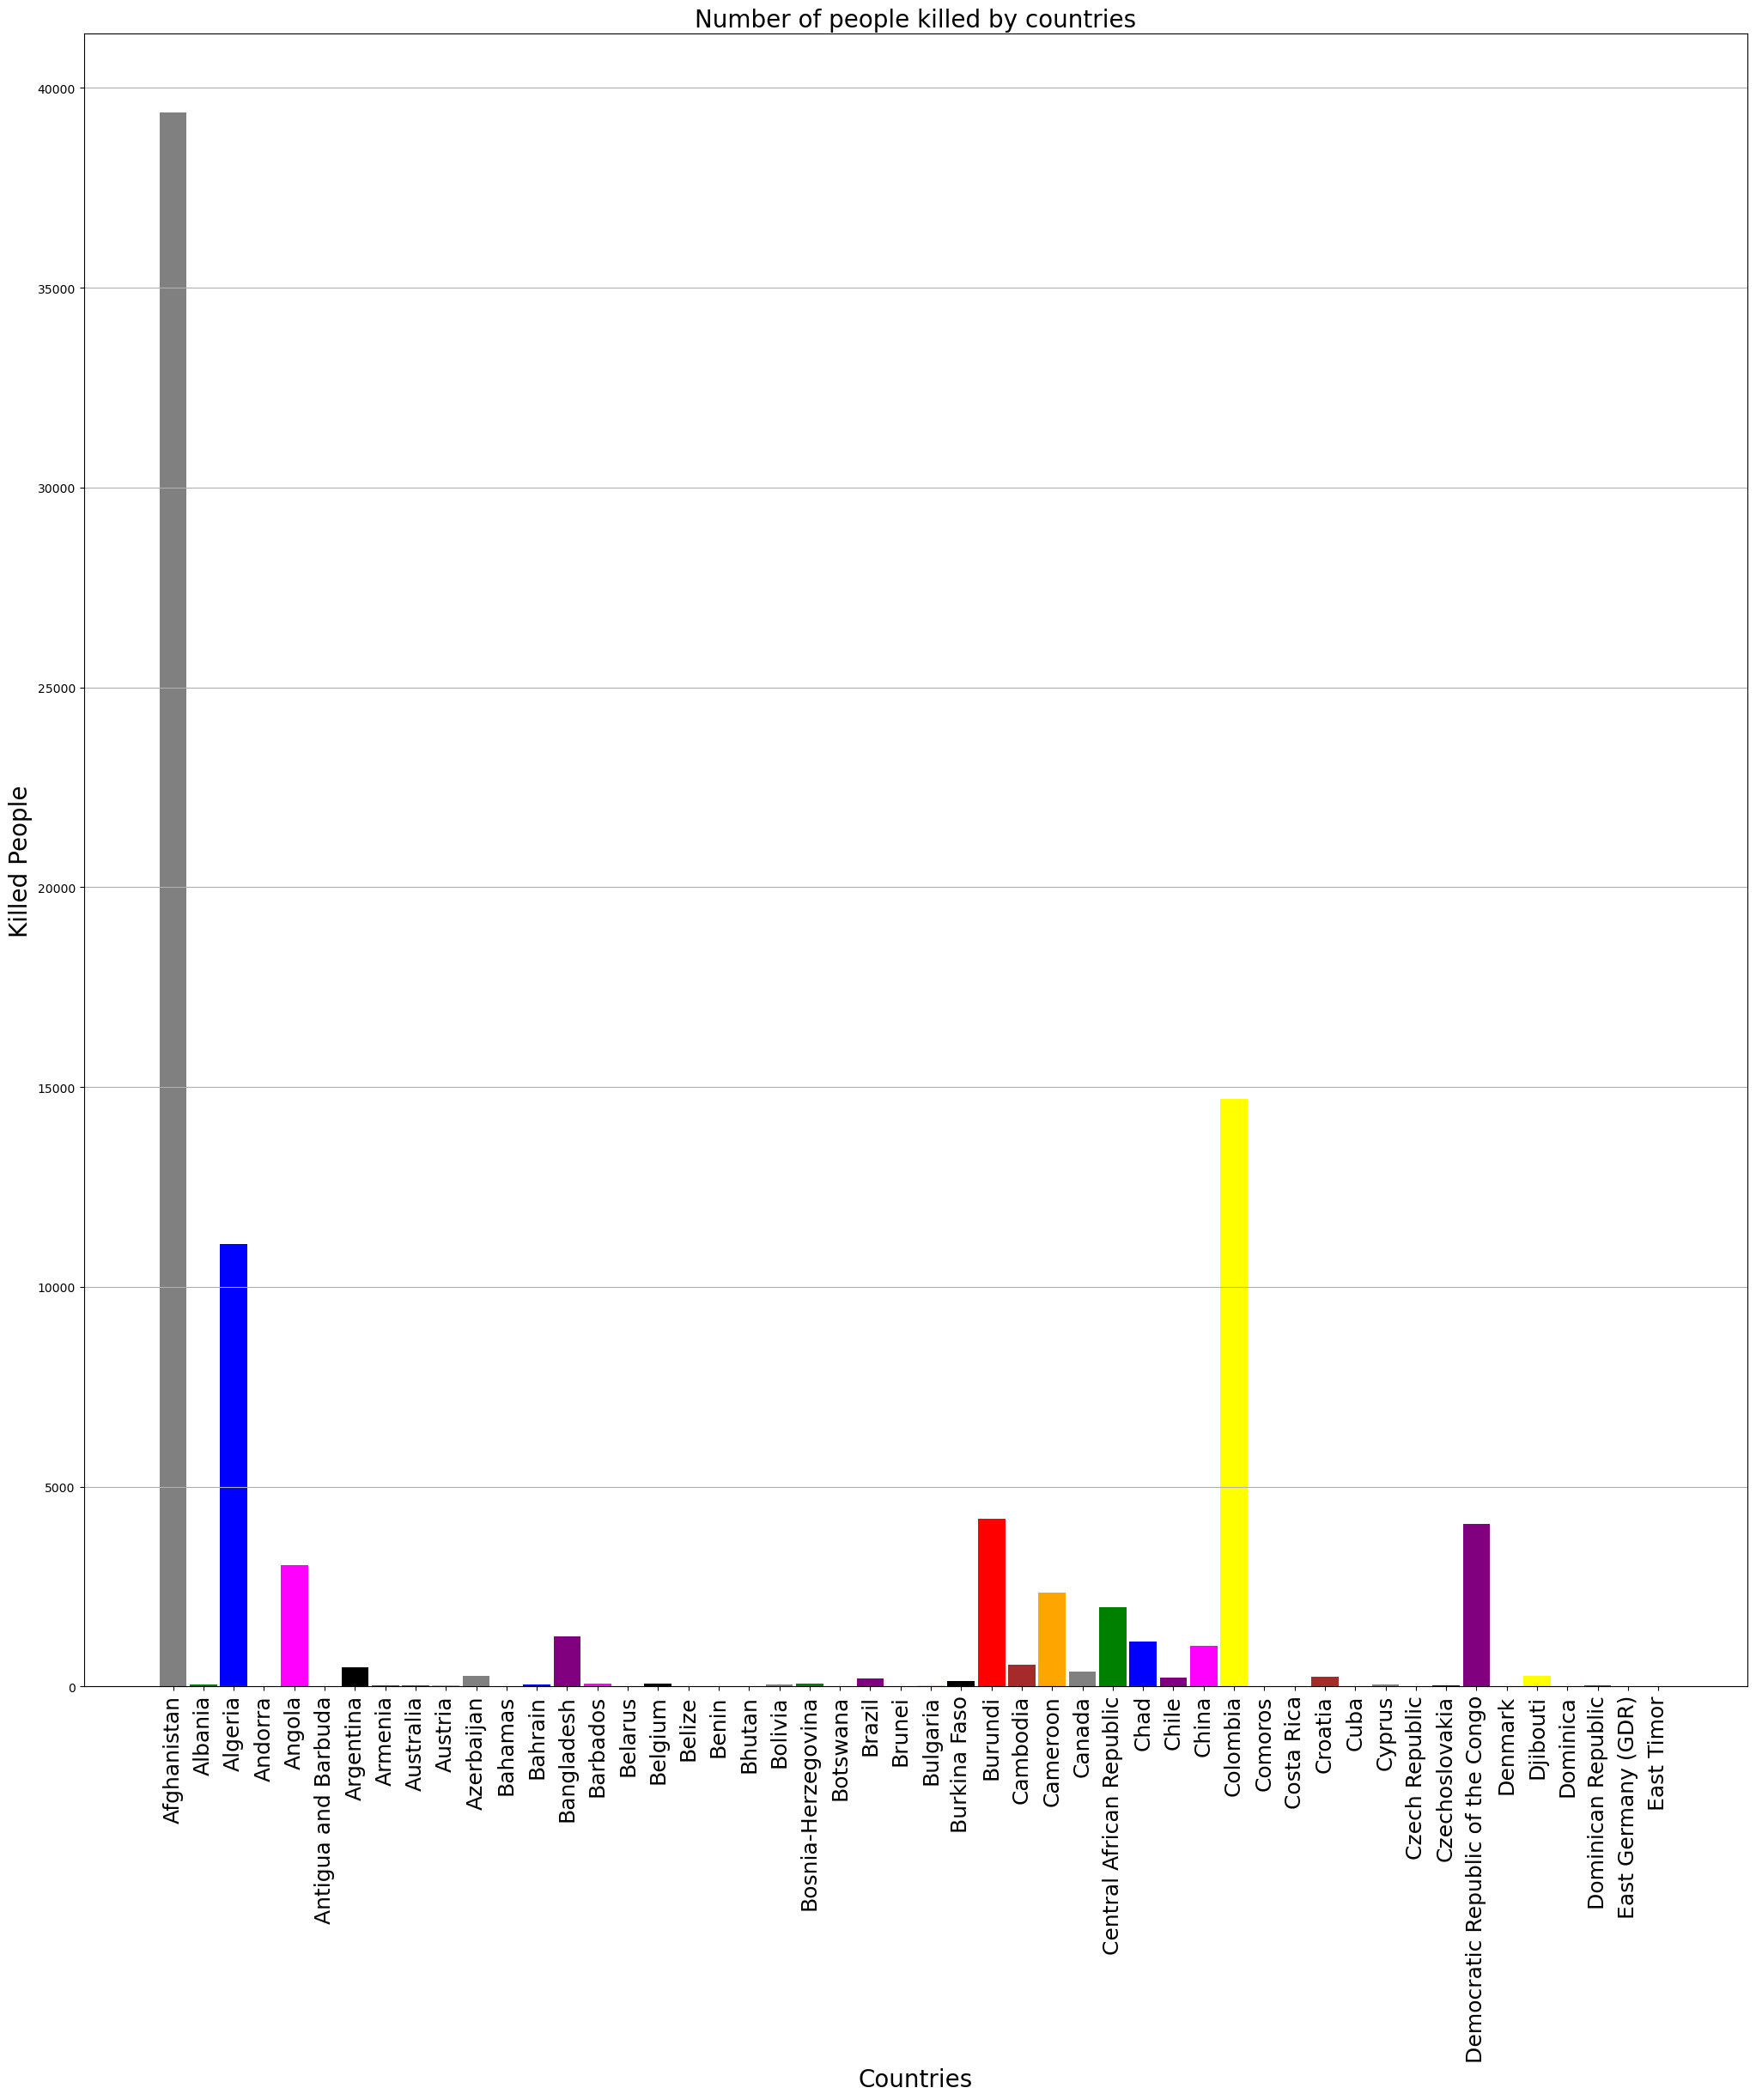

In [51]:
# Generate bar charts for the number of people killed by country, split into three parts for readability.
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['gray', 'green', 'blue', 'purple', 'magenta', 'yellow', 'black', 'red', 'brown', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)

plt.savefig(os.path.join(output_folder, 'Killed_by_Country_Bar_Chart.png'))

plt.show()

### <center>The analysis of these graphics reveals that terrorist acts in the Middle East and North Africa have the most fatal consequences. The data also suggests that Iraq, Afghanistan, and Pakistan are the most severely affected countries.</center>